## 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [15]:
from bs4 import BeautifulSoup  as bs 
import pandas as pd
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20200124"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20200124" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [4]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189111" title="두 교황">두 교황</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=185275" title="미안해요, 리키">미안해요, 리키</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=150376" title="나, 다니엘 블레이크">나, 다니엘 블레이크</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190395" title="눈의 여왕4">눈의 여왕4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=185282" title="타오르는 여인의 초상">타오르는 여인의 초상</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189000" title="나이브스 아웃">나이브스 아웃</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=19031" title="러브레

In [7]:
soup.find_all('div', 'tit5')[0].a.string

'포드 V 페라리'

In [8]:
soup.find_all('td', 'point')[0].string

'9.53'

In [13]:
date = pd.date_range('2019-10-17', periods=100, freq='D')
date

DatetimeIndex(['2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
               '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
               '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-07',
               '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
      

In [18]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html= "https://movie.naver.com/"+ "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    
    response = urlopen(html.format(date= urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = bs(response, 'html.parser')
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [53]:
movie = pd.DataFrame({
        'date':movie_date,
        'name':movie_name,
        'point':movie_point
})

movie

,date,name,point
0,2019-10-17,주전장,9.51
1,2019-10-17,안녕 베일리,9.40
2,2019-10-17,아이언 자이언트,9.33
3,2019-10-17,폴란드로 간 아이들,9.32
4,2019-10-17,교회오빠,9.28
...,...,...,...
4592,2020-01-24,대통령의 7시간,6.00
4593,2020-01-24,백두산,5.90
4594,2020-01-24,아내를 죽였다,5.17
4595,2020-01-24,미스터 주: 사라진 VIP,5.13


In [56]:

movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 3 columns):
date     4597 non-null datetime64[ns]
name     4597 non-null object
point    4597 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 107.9+ KB


In [57]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_unique

,point
name,
21 브릿지: 테러 셧다운,136.33
47미터 2,235.25
7번방의 선물,8.83
80일간의 세계일주,7.18
82년생 김지영,581.91
...,...
해피 엔드,239.83
행동하는 양심 김대중,27.40
헌터 킬러,103.07


In [58]:
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best

,point
name,
벌새,889.17
주전장,883.62
메기,834.58
기생충,831.58
교회오빠,825.03
...,...
박열,8.09
인천상륙작전,8.03
분노의 질주: 홉스&쇼,7.83


In [59]:
tmp = movie.query('name == ["포드 V 페라리"]')
tmp

,date,name,point
2342,2019-12-05,포드 V 페라리,9.65
2392,2019-12-06,포드 V 페라리,9.67
2442,2019-12-07,포드 V 페라리,9.61
2492,2019-12-08,포드 V 페라리,9.61
2540,2019-12-09,포드 V 페라리,9.57
2588,2019-12-10,포드 V 페라리,9.58
2638,2019-12-11,포드 V 페라리,9.58
2688,2019-12-12,포드 V 페라리,9.58
2738,2019-12-13,포드 V 페라리,9.56
2788,2019-12-14,포드 V 페라리,9.56


No handles with labels found to put in legend.


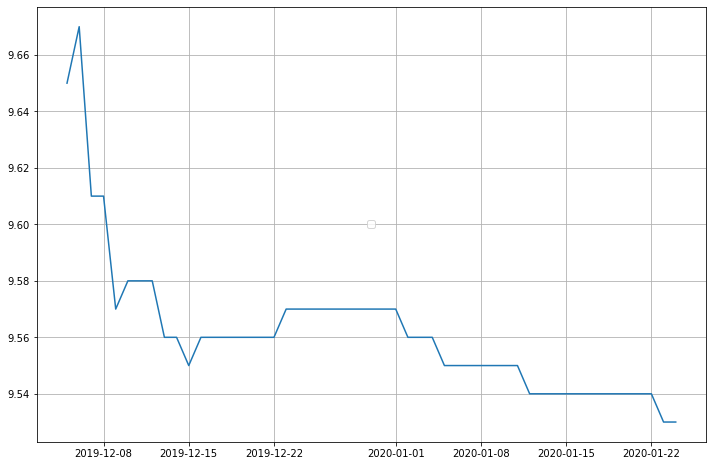

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='center')
plt.grid()
plt.show()

In [61]:
movie_best.head(10)

,point
name,
벌새,889.17
주전장,883.62
메기,834.58
기생충,831.58
교회오빠,825.03
날씨의 아이,684.64
조커,667.04
윤희에게,626.16
82년생 김지영,581.91


In [63]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                    \
name       21 브릿지: 테러 셧다운 47미터 2 7번방의 선물 80일간의 세계일주 82년생 김지영 가버나움 가장 보통의 연애   
date                                                                          
2019-10-17            NaN   7.28     NaN        NaN      NaN  NaN      7.94   
2019-10-18            NaN   7.28     NaN        NaN      NaN  NaN      7.94   
2019-10-19            NaN   7.28     NaN        NaN      NaN  NaN      7.94   
2019-10-20            NaN   7.28     NaN        NaN      NaN  NaN      7.94   
2019-10-21            NaN   7.28     NaN        NaN      NaN  NaN      7.93   

                                ...                                        \
name       감쪽같은 그녀 겨울왕국 겨울왕국 2  ... 하이큐!! 끝과 시작 하이큐!! 승자와 패자 하이큐!! 재능과 센스   
date                            ...                                         
2019-10-17     NaN  NaN    NaN  ...         NaN          NaN          NaN   
2019-10-18     NaN  NaN    NaN  ...         NaN          NaN          NaN   
2019-10-19     NaN  NaN    NaN  ...         NaN          NaN          NaN   
2019-10-20     NaN  NaN    NaN  ...         NaN          NaN          NaN   
2019-10-21     NaN  NaN    NaN  ...         NaN          NaN          NaN   

                                                                      
name       항거:유관순 이야기 해치지않아 해피 엔드 행동하는 양심 김대중 헌터 킬러 히트맨 힘을 내요, 미스터 리  
date                                                                  
2019-10-17        NaN   NaN   NaN         NaN   NaN NaN         7.58  
2019-10-18        NaN   NaN   NaN         NaN   NaN NaN         7.58  
2019-10-19        NaN   NaN   NaN         NaN   NaN NaN         7.58  
2019-10-20        NaN   NaN   NaN         NaN   NaN NaN         7.57  
2019-10-21        NaN   NaN   NaN         NaN   NaN NaN         7.57  

[5 rows x 206 columns]

In [65]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [66]:
movie_pivot.head()

name,21 브릿지: 테러 셧다운,47미터 2,7번방의 선물,80일간의 세계일주,82년생 김지영,가버나움,가장 보통의 연애,감쪽같은 그녀,겨울왕국,겨울왕국 2,...,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스,항거:유관순 이야기,해치지않아,해피 엔드,행동하는 양심 김대중,헌터 킬러,히트맨,"힘을 내요, 미스터 리"
date,,,,,,,,,,,,,,,,,,,,,
2019-10-17,NaN,7.28,NaN,NaN,NaN,NaN,7.94,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.58
2019-10-18,NaN,7.28,NaN,NaN,NaN,NaN,7.94,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.58
2019-10-19,NaN,7.28,NaN,NaN,NaN,NaN,7.94,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.58
2019-10-20,NaN,7.28,NaN,NaN,NaN,NaN,7.94,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.57
2019-10-21,NaN,7.28,NaN,NaN,NaN,NaN,7.93,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.57


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path = 'c:/Windows/Fonts/malgun.ttf'

from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("찾을 수 없다")

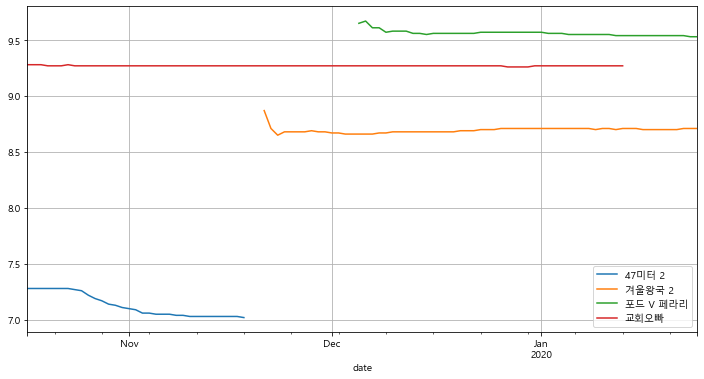

In [73]:
movie_pivot.plot(y=['47미터 2', '겨울왕국 2', '포드 V 페라리', '교회오빠'], figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()